<a href="https://colab.research.google.com/github/prashants975/Projects_on_ML/blob/master/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns 

In [0]:
url = 'https://raw.githubusercontent.com/buildforbharat/datasets/master/cars.csv'

In [0]:
cars = pd.read_csv( url)

In [4]:
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
Price       804 non-null float64
Mileage     804 non-null int64
Make        804 non-null object
Model       804 non-null object
Trim        804 non-null object
Type        804 non-null object
Cylinder    804 non-null int64
Liter       804 non-null float64
Doors       804 non-null int64
Cruise      804 non-null int64
Sound       804 non-null int64
Leather     804 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
cars.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073875,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995020,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316635,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466720,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


```
Questions to Answer
1. Create a logistic regression model. Create your own loss function for this. Which optimizer is the best fit for this loss function ?
2. Create a gradient boosted trees model . Create your own loss function for this. Which optimizer is the best fit for this loss function ?
3. Create random forest model.
4. write a note - which one is performing best ? why ?
```

## Visulization
Lets First visulize the data

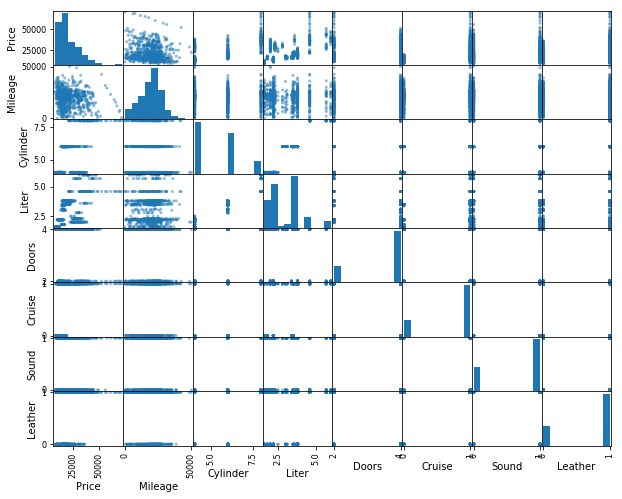

In [7]:
from pandas.plotting import scatter_matrix 
scatter_matrix(cars, figsize=(10,8));

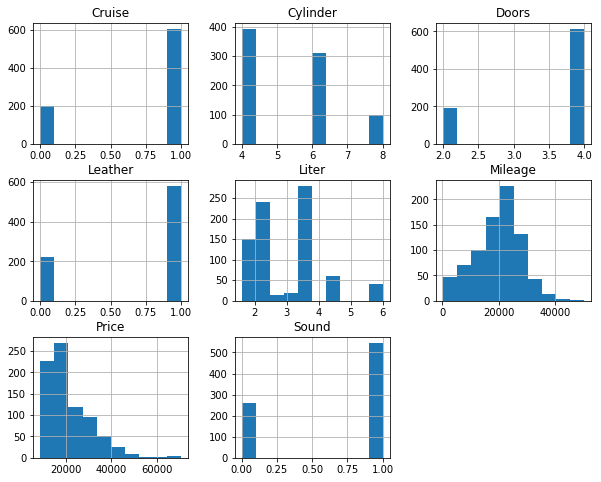

In [8]:
cars.hist(figsize = (10,8));

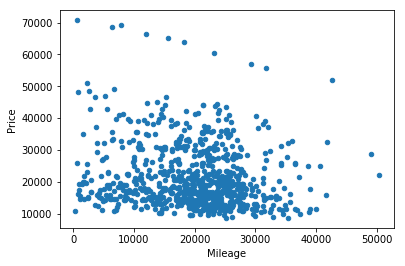

In [9]:
cars.plot(x = 'Mileage', y = 'Price', kind = 'scatter')

In [10]:
print(cars['Make'].value_counts())
print(cars['Type'].value_counts())

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64
Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64


In [11]:
print(cars['Trim'].value_counts())

Sedan 4D               170
LS Sedan 4D             50
Coupe 2D                50
LT Sedan 4D             30
LS Coupe 2D             30
GT Sedan 4D             20
Arc Sedan 4D            20
Quad Coupe 2D           20
SE Sedan 4D             20
Aero Sedan 4D           20
Linear Wagon 4D         14
LS Hatchback 4D         10
Aero Wagon 4D           10
GT Coupe 2D             10
MAXX Hback 4D           10
LS MAXX Hback 4D        10
Special Ed Ultra 4D     10
LS Sport Coupe 2D       10
CXS Sedan 4D            10
LT MAXX Hback 4D        10
L300 Sedan 4D           10
AWD Sportwagon 4D       10
LT Hatchback 4D         10
SVM Sedan 4D            10
Custom Sedan 4D         10
GTP Sedan 4D            10
Sportwagon 4D           10
Hardtop Conv 2D         10
Linear Conv 2D          10
DTS Sedan 4D            10
LT Coupe 2D             10
SVM Hatchback 4D        10
SS Coupe 2D             10
Arc Wagon 4D            10
Aero Conv 2D            10
Conv 2D                 10
Linear Sedan 4D         10
A

In [12]:
print(cars['Model'].value_counts())

Malibu         60
Cavalier       60
AVEO           60
Ion            50
Cobalt         50
9_3 HO         40
Impala         30
Monte Carlo    30
Deville        30
Bonneville     30
Grand Prix     30
Lacrosse       30
Vibe           30
9_5            30
9_3            20
Corvette       20
Lesabre        20
G6             20
9_5 HO         20
Park Avenue    20
Grand Am       20
Century        10
CST-V          10
GTO            10
XLR-V8         10
STS-V6         10
CTS            10
Sunfire        10
Classic        10
L Series       10
STS-V8         10
9-2X AWD        4
Name: Model, dtype: int64


In [0]:
X = cars.drop(columns='Price')
y = cars.loc[:,'Price']


In [0]:
num = ['Mileage',	'Cylinder',	'Liter',	'Doors',	'Cruise',	'Sound',	'Leather']
cat = ['Make',	'Model',	'Trim',	'Type']

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
("num", num_pipeline, num),
("cat", OneHotEncoder(), cat),
])
X = full_pipeline.fit_transform(X).toarray()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [28]:
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [29]:
rnd_clf.score(X_test, y_test)

0.990845992737655

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [38]:
gbrt.score(X_test, y_test)

0.98766780026199